In [ ]:
!pip install mlcroissant

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import mlcroissant as mlc
import pandas as pd
import requests
import json

# Fetch the Croissant JSON-LD from the URL
url = 'https://www.kaggle.com/datasets/shriyashjagtap/heart-attack-risk-assessment-dataset/croissant/download?resource=download'
response = requests.get(url)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)

# Assuming the response is JSON, load it
croissant_data = response.json()

# Now, create the Dataset object from the JSON data
data = mlc.Dataset(croissant_data)

# Check what record sets are in the dataset
record_sets = data.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
df = pd.DataFrame(data.records(record_set=record_sets[0].uuid))
df.head()

  -  [Metadata(Heart Attack Risk Assessment Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="updated_version.csv")]


,updated_version.csv/age,updated_version.csv/sex,updated_version.csv/total_cholesterol,updated_version.csv/ldl,updated_version.csv/hdl,updated_version.csv/systolic_bp,updated_version.csv/diastolic_bp,updated_version.csv/smoking,updated_version.csv/diabetes,updated_version.csv/heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   updated_version.csv/age                1000 non-null   int64  
 1   updated_version.csv/sex                1000 non-null   int64  
 2   updated_version.csv/total_cholesterol  1000 non-null   float64
 3   updated_version.csv/ldl                1000 non-null   float64
 4   updated_version.csv/hdl                1000 non-null   float64
 5   updated_version.csv/systolic_bp        1000 non-null   float64
 6   updated_version.csv/diastolic_bp       1000 non-null   float64
 7   updated_version.csv/smoking            1000 non-null   int64  
 8   updated_version.csv/diabetes           1000 non-null   int64  
 9   updated_version.csv/heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


In [ ]:
df.shape

(1000, 10)

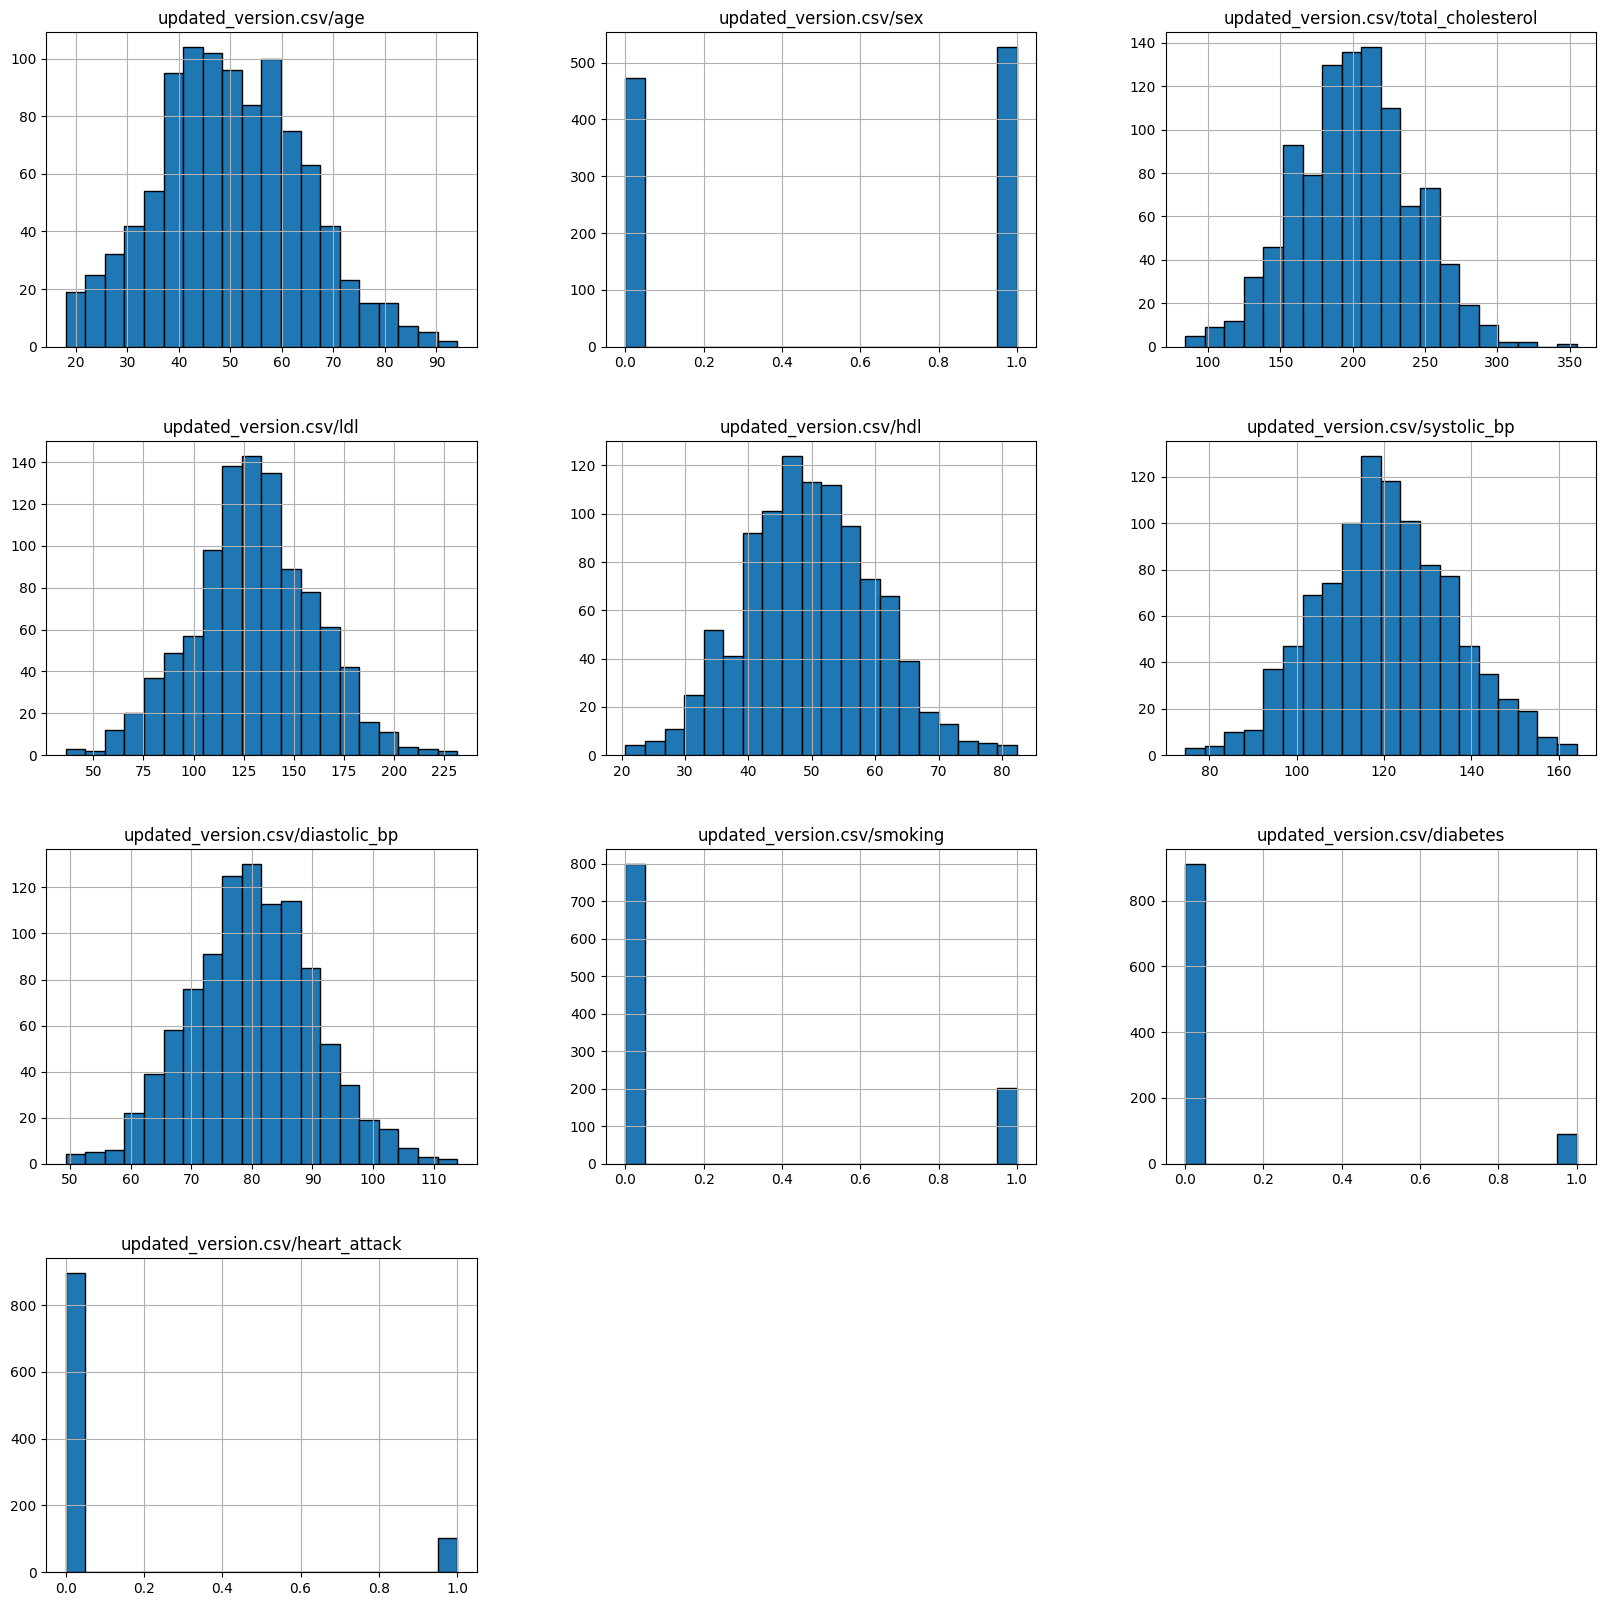

In [ ]:
df.hist( figsize = (20,20),bins = 20, edgecolor = 'black')
plt.show()

In [ ]:
df = df.rename(columns = lambda x: x.split('/')[-1])

In [ ]:
df

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,65,1,195.336429,149.070951,43.914928,132.878440,86.246414,0,0,0
996,60,1,192.342928,134.357395,53.380714,145.149535,91.069141,0,0,0
997,70,0,174.179319,125.900047,50.406918,133.022878,85.851330,0,0,0
998,48,0,189.715685,152.388737,40.700912,113.527965,86.368294,0,0,0


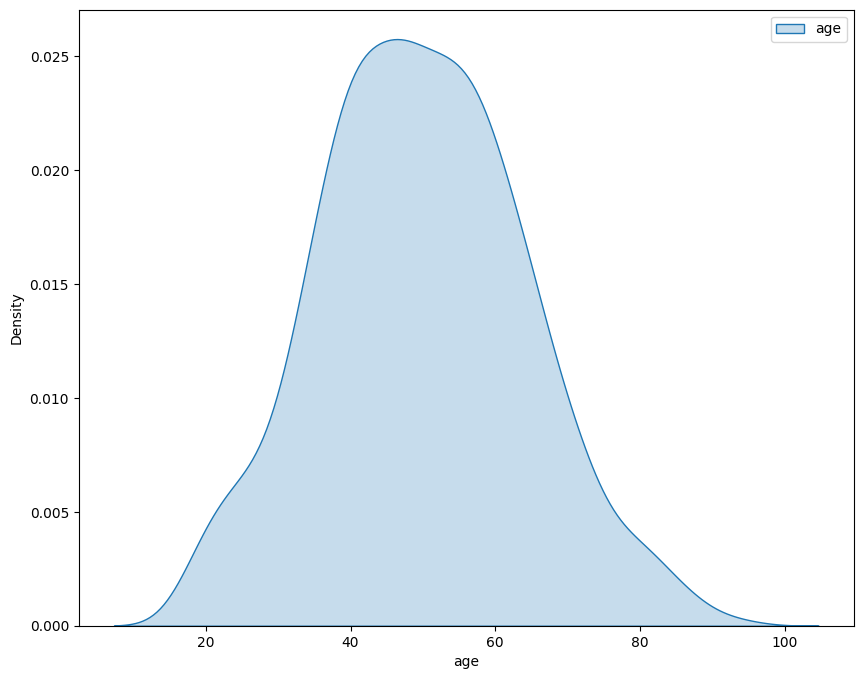

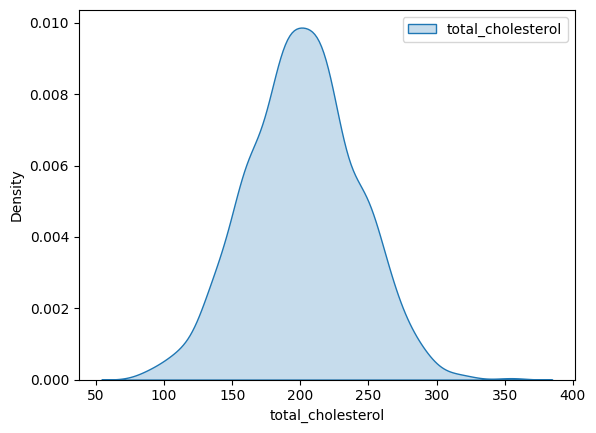

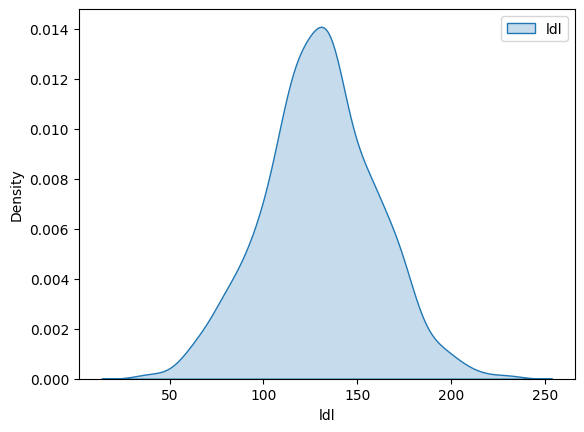

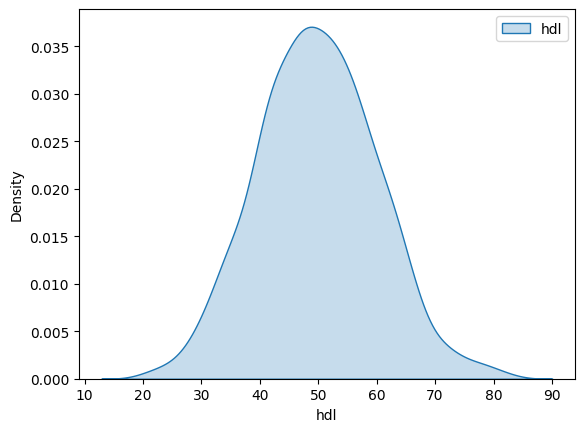

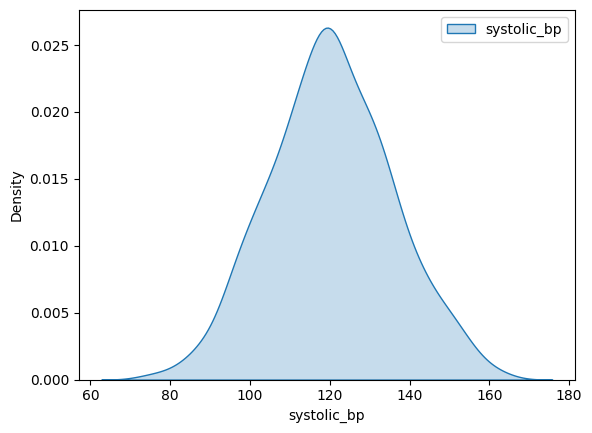

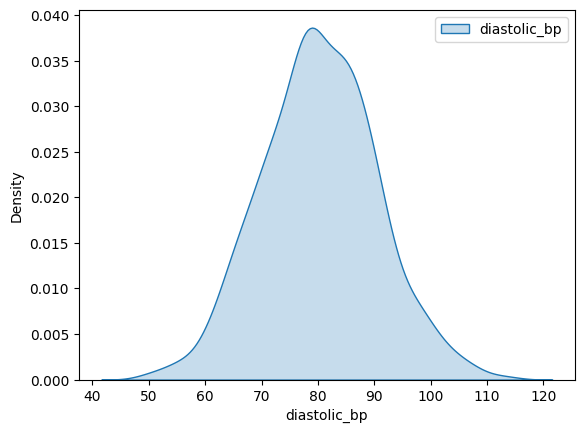

In [ ]:
plt.figure(figsize=(10, 8))
for column in ['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']:
  sns.kdeplot(df[column], label = column, fill = True)
  plt.legend()
  plt.show()

In [ ]:
num_cols = ['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']

In [ ]:
def detect_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers = {}
for col in num_cols:
  outliers[col] = detect_outliers(df, col)

print("\nOutlier Counts:")
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")


Outlier Counts:
age: 4 outliers
total_cholesterol: 10 outliers
ldl: 12 outliers
hdl: 8 outliers
systolic_bp: 6 outliers
diastolic_bp: 9 outliers


In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
skew_vals = df[num_cols].apply(skew).rename("SKewness")
kurt_vals = df[num_cols].apply(kurtosis).rename("Kurtosis")

stats_df = pd.concat([skew_vals, kurt_vals], axis = 1)
print(stats_df)

                   SKewness  Kurtosis
age                0.157835 -0.218068
total_cholesterol  0.027614 -0.021681
ldl                0.022623  0.132969
hdl                0.116541 -0.030285
systolic_bp        0.051532 -0.165585
diastolic_bp       0.054846  0.047676


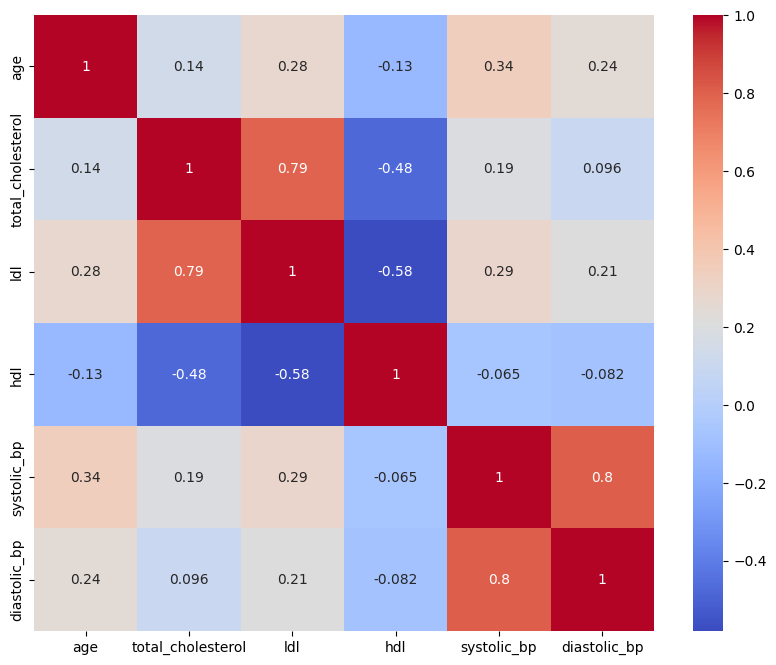

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
! pip install umap-learn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

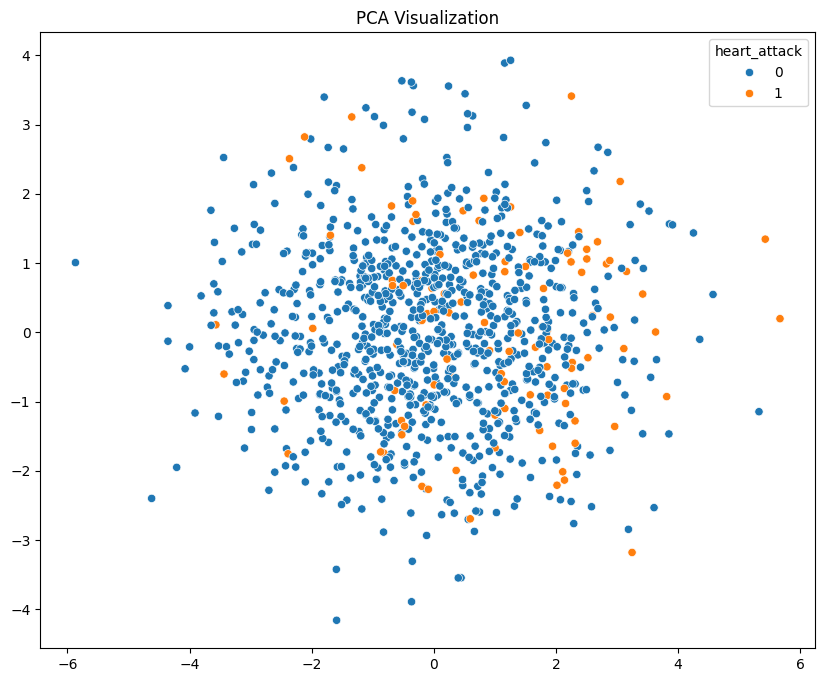

In [ ]:
X =  df[['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp', 'sex', 'smoking', 'diabetes']]
y = df['heart_attack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA Visualization
pca = PCA(n_components = 2)
X_pca  = pca.fit_transform(X_scaled)

plt.figure(figsize = (10, 8))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = y)
plt.title("PCA Visualization")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
X =  df[['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp', 'sex', 'smoking', 'diabetes']]
y = df['heart_attack']

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Fixed the comparison operator
    return df

# remove outliers and split data
num_cols = ['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']
data_cleaned = remove_outliers(df, num_cols)
X_cleaned = data_cleaned.drop('heart_attack', axis=1)
y_cleaned = data_cleaned['heart_attack']

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Now you can proceed with scaling:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
# Train Model
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       169
           1       0.75      0.25      0.38        24

    accuracy                           0.90       193
   macro avg       0.83      0.62      0.66       193
weighted avg       0.88      0.90      0.87       193

Accuracy Score: 0.8963730569948186
